# Reinforcement learning



In [1]:
#Random actions

import gym

import numpy as np

import random

In [2]:
# create Taxi environment

env = gym.make('Taxi-v3')

In [3]:
# create a new instance of taxi, and get the initial state

#state = env.reset()

state = env.reset()
env.render()
num_steps = 99

for s in range(num_steps+1):

    print(f"step: {s} out of {num_steps}")



    # sample a random action from the list of available actions

    action = env.action_space.sample()



    # perform this action on the environment

    env.step(action)



    # print the new state

    env.render()



# end this instance of the taxi environment

env.close()

In [4]:
#Train using Q-learning (q-table)

import numpy as np

import gym

import random



# create Taxi environment

env = gym.make('Taxi-v3')



# initialize q-table

state_size = env.observation_space.n

action_size = env.action_space.n

qtable = np.zeros((state_size, action_size))



# hyperparameters

learning_rate = 0.9

discount_rate = 0.8

epsilon = 1.0

decay_rate= 0.005



# training variables

num_episodes = 1000

max_steps = 99 # per episode





# If epsilon is 0.7, there is a 70% chance that on this step

# our agent will explore instead of exploit. 

# epsilon exponentially decays with each step, 

# so that our agent explores less and less over time.
# training

for episode in range(num_episodes):



    # reset the environment

    state = env.reset()

    done = False



    for s in range(max_steps):



        # exploration-exploitation tradeoff

        if random.uniform(0,1) < epsilon:

            # explore

            action = env.action_space.sample()

        else:

            # exploit

            action = np.argmax(qtable[state,:])



        # take action and observe reward

        new_state, reward, done, info = env.step(action)



        # Q-learning algorithm

        qtable[state,action] = qtable[state,action] + learning_rate * (reward + discount_rate * np.max(qtable[new_state,:])-qtable[state,action])



        # Update to our new state

        state = new_state



        # if done, finish episode

        if done == True:

            break



    # Decrease epsilon

    epsilon = np.exp(-decay_rate*episode)



print(f"Training completed over {num_episodes} episodes")



Training completed over 1000 episodes


In [5]:
qtable

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [ -3.97615583,  -3.97642353,  -3.04178433,  -2.4824559 ,
         -1.6445568 , -11.41713202],
       [ -3.55934129,   1.54858883,   0.23906666,   1.07201869,
          3.192     ,  -7.92379955],
       ...,
       [ -2.24316   ,   5.24      ,   2.6371188 ,   1.55317544,
         -6.33513648,  -6.13875153],
       [ -3.86004745,  -3.78105033,  -3.783863  ,  -1.10163573,
        -11.40256282, -12.47097381],
       [ -0.9       ,  -0.9       ,  -0.9       ,  15.        ,
         -9.9       ,  -9.        ]])

In [6]:
## Watch trained agent

# watch trained agent

state = env.reset()

done = False

rewards = 0



for s in range(max_steps):



    print(f"TRAINED AGENT")

    print("Step {}".format(s+1))



    action = np.argmax(qtable[state,:])

    new_state, reward, done, info = env.step(action)

    rewards += reward

    env.render()

    print(f"score: {rewards}")

    state = new_state



    if done == True:

        break

env.close()



TRAINED AGENT
Step 1
score: -1
TRAINED AGENT
Step 2
score: -2
TRAINED AGENT
Step 3
score: -3
TRAINED AGENT
Step 4
score: -4
TRAINED AGENT
Step 5
score: -5
TRAINED AGENT
Step 6
score: -6
TRAINED AGENT
Step 7
score: -7
TRAINED AGENT
Step 8
score: -8
TRAINED AGENT
Step 9
score: -9
TRAINED AGENT
Step 10
score: -10
TRAINED AGENT
Step 11
score: -11
TRAINED AGENT
Step 12
score: -12
TRAINED AGENT
Step 13
score: -13
TRAINED AGENT
Step 14
score: -14
TRAINED AGENT
Step 15
score: 6


In [7]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
print("TensorFlor Version:", tf.__version__)



C:\Users\hocineg\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\__init__.py:29: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  import distutils as _distutils
C:\Users\hocineg\AppData\Local\Programs\Python\Python310\lib\site-packages\flatbuffers\compat.py:19: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp
C:\Users\hocineg\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\image_utils.py:36: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  'nearest': pil_image.NEAREST,
C:\Users\hocineg\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\image_utils.py:37: DeprecationWarning: BILINEAR is deprecated and will be

TensorFlor Version: 2.9.1


In [8]:
# Import data from KERAS dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train, x_test = x_train / 255.0, x_test / 255.0

# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255


In [13]:
x_train.shape #training set contains 60 000 images, each 28x28 pixels
x_test.shape # test set contains 10 000 images
x_train[0].shape # single image is an array of 28x28 pixels

(28, 28, 1)

In [14]:
##### CREATE ANN ##############
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(10)
])

In [15]:
###### LOSS FUNCTION ############
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [16]:
######## COMPILE MODEL ###########
model.compile(optimizer='adam',
loss=loss_fn,
metrics=['accuracy'])

In [17]:
######## TRAIN THE MODEL ############
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2977 - accuracy: 0.9133
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1465 - accuracy: 0.9560
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1092 - accuracy: 0.9673
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0877 - accuracy: 0.9725
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0770 - accuracy: 0.9762


In [18]:
######### MODEL EVALUATION ############
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0767 - accuracy: 0.9765 - 339ms/epoch - 1ms/step


[0.07670620083808899, 0.9764999747276306]

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [20]:
####### PREP PROB MODEL FOR PREDICTION #########
probability_model = tf.keras.Sequential([
model,
tf.keras.layers.Softmax()
])



In [21]:
########## MAKE PREDICTIONS ON TEST DATA #######
predict_x = model.predict(x_test)
predicted_classes = np.argmax(predict_x,axis=1)

predicted_classes

313/313 [==============================] - 0s 729us/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

[[ 972    0    1    0    0    1    3    1    2    0]
 [   0 1115    6    0    0    1    4    1    8    0]
 [   3    0 1014    1    1    1    3    6    3    0]
 [   0    0   11  981    0    3    0    7    5    3]
 [   1    0    4    0  949    0    9    2    2   15]
 [   3    0    0    8    2  867    4    1    5    2]
 [   4    3    1    1    1   10  934    0    4    0]
 [   1    3   18    0    1    0    0 1002    1    2]
 [   4    0    5    3    3    2    0    4  951    2]
 [   2    2    0    3    6    1    2   12    1  980]]


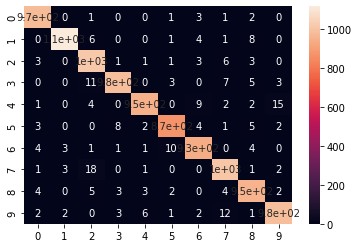

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.98      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.98      0.97      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.97      0.98       892
           6       0.97      0.97      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [22]:
########### CONFUSION MATRIX #######
# Show confusion matrix of the predictions
cm = confusion_matrix(y_test, predicted_classes)
print(cm)
sns.heatmap(cm, annot=True)
plt.show()
print(classification_report(y_test, predicted_classes))

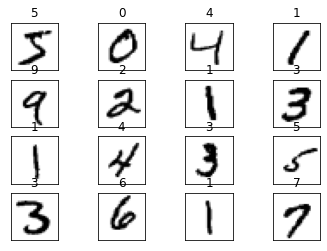

In [73]:
##### LOOK AT SOME TRAINING IMAGES AND THEIR LABELS ####
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(28,28), cmap=plt.cm.binary)
    plt.title(y_train[i])
plt.show()

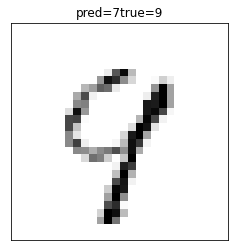

In [74]:
###### LOOK AT SOME FAILED PREDICTIONS #######
idx2 = np.where(y_test != predicted_classes)[0]

idx2osa = idx2[:20]
for i in idx2osa:
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28,28), cmap=plt.cm.binary)
    plt.title('pred='+str(predicted_classes[i])+ 'true='+str(y_test[i]))
plt.show()

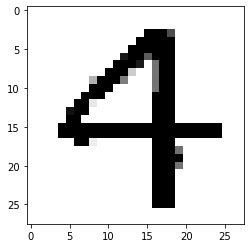

1/1 [==============================] - 0s 13ms/step
1


In [106]:
#Predict custom image from file
###############################
import cv2
image = cv2.imread("image.png.png", cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (28,28))
image = image.astype('float32')
image = image.reshape(1, 28, 28, 1)
image = 255-image
image /= 255

plt.imshow(image.reshape(28, 28),cmap='Greys')
plt.show()
pred = model.predict(image.reshape(1, 28, 28, 1), batch_size=1)

print(pred.argmax())

In [25]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

# Split into test and train sets
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)


# Standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_img)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)
train_img.shape

(60000, 784)

In [26]:
# Set up PCA model
from sklearn.decomposition import PCA
pca = PCA(0.95) # explained variance is at least 95%
#transform train and test data
pca.fit(train_img)
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [27]:
train_img.shape # shape is reduced after PCA

(60000, 327)

In [29]:
# Logistic regressor, train, predict
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_img, train_lbl)
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))


C:\Users\hocineg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['0'], dtype=object)

In [30]:
logisticRegr.score(test_img, test_lbl) #r2 score of classification


0.9201

In [31]:

##https://www.tensorflow.org/tutorials/keras/classification
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [32]:
#Import data
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
print(train_images.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)


In [34]:
#Preprocess images
train_images = train_images / 255.0
test_images = test_images / 255.0
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

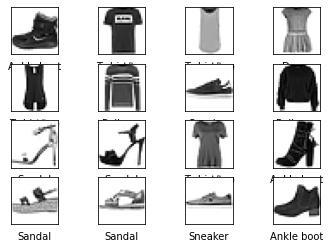

In [35]:
#Take a look at some images
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [36]:
#Compile  model etc.
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dense(10)
])
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4943 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3696 - accuracy: 0.8663
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3336 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3094 - accuracy: 0.8858
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2905 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2775 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2633 - accuracy: 0.9021
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2543 - accuracy: 0.9053
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2453 - accuracy: 0.9086
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.234

In [37]:
##### EVALUATE
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.3555 - accuracy: 0.8752 - 312ms/epoch - 997us/step

Test accuracy: 0.8751999735832214


In [38]:
#PRERICTIONS
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 753us/step


In [42]:
# Predictions are actually probabilities here, largest wins
print(predictions[0])# first test image, index=0
print(np.argmax(predictions[0]))
print(class_names[np.argmax(predictions[0])])
print(test_labels[1])

[6.2572276e-08 1.8553466e-08 1.4165443e-07 1.5015900e-10 6.5834854e-08
 8.3566592e-05 7.1160457e-07 2.4193011e-03 2.8358130e-08 9.9749607e-01]
9
Ankle boot
2


In [48]:
#Helper functions for printing prob distributions
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
    100*np.max(predictions_array),
    class_names[true_label]),
    color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')



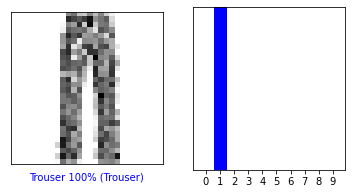

In [69]:
###### LOOK AT SOME TEST IMAGES AND PROB DISTRIBUTIONS
i = 128
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()



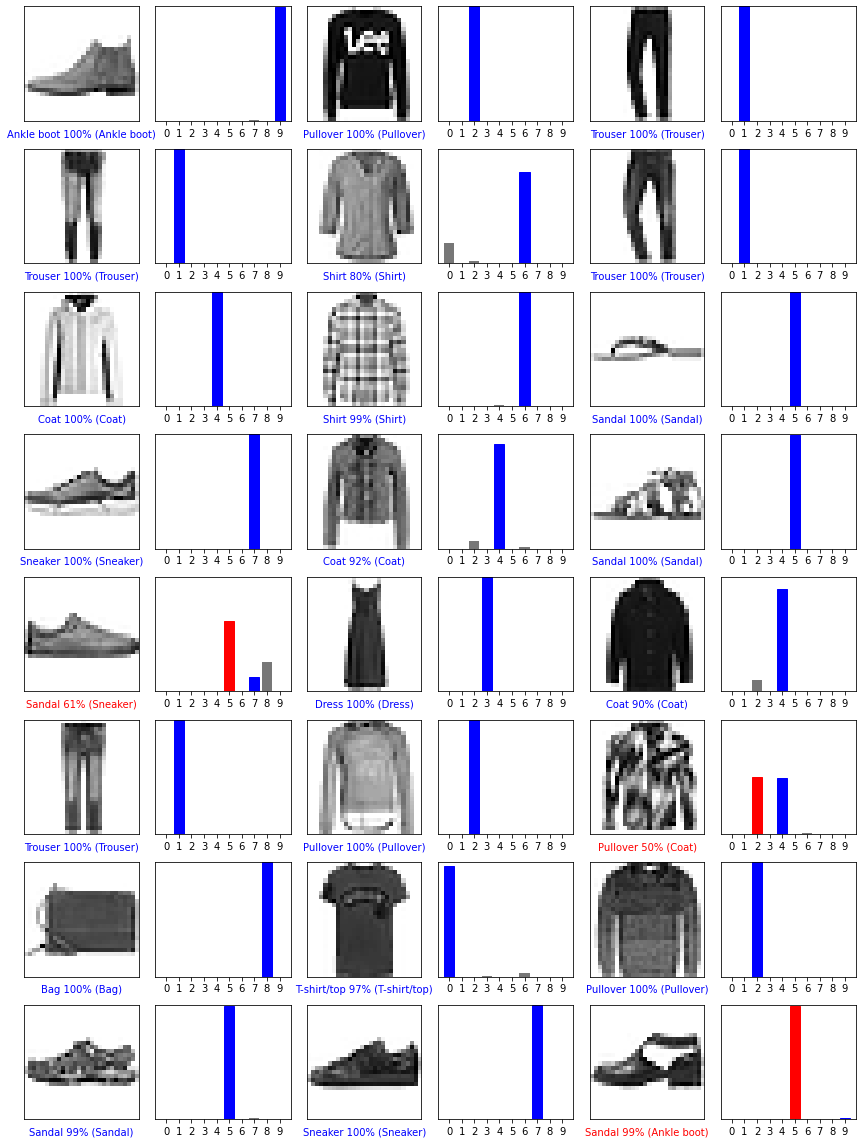

In [70]:
# Look at predictions for a set of images at once (subplot)
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 8
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
    plt.tight_layout()
plt.show()